# Regression Analysis

- Regression line
- Correlation

In [106]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Regression Line

Fit a line, using the powerful "ordinary least square" method of pandas.

*Data from 24 type 1 diabetic patients, relating Fasting blood glucose (mmol/l) to mean circumferential shortening velocity (%/sec), derived form echocardiography.*

In [123]:
# Get the data
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
inFile = 'altman_11_6.txt'
url = url_base + inFile
df = pd.read_csv(url, names=['glucose', 'Vcf'])
print(df.head(5))
print('Delete rows containing "nan"')
df.Vcf = pd.to_numeric(df.Vcf, errors='coerce')
df.dropna(inplace=True)
print(df.head(5))

   glucose    Vcf
0     15.3   1.76
1     10.8   1.34
2      8.1   1.27
3     19.5   1.47
4      7.2   1.27
Delete rows containing "nan"
   glucose   Vcf
0     15.3  1.76
1     10.8  1.34
2      8.1  1.27
3     19.5  1.47
4      7.2  1.27


#### Solve equations "by hand" ...

(array([1.098, 0.022]), array([0.986]), 2, array([54.079,  1.838]))
Plot regression fitted line


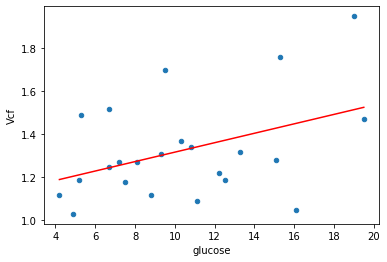

In [124]:
x, y = df.glucose.values, df.Vcf.values

# Create the design matrix
X_mat = sm.add_constant(x)

# Calculate the parameters
params = np.linalg.lstsq(X_mat, y, rcond=None)
np.set_printoptions(precision=3)
print(params)

print('Plot regression fitted line')
x_reg = np.linspace(df.glucose.min(), df.glucose.max(), len(df.Vcf))
y_reg = x_reg * params[0][1] + params[0][0]
df.plot.scatter(x='glucose', y='Vcf')
plt.plot(x_reg, y_reg, 'r')
plt.show()


#### ... then solve them with *pandas* and *statsmodels*

pandas handles "nan" gracefully, and also provides more information about the fit.
So let's use pandas, and compare the results

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.134   
Dependent Variable: Vcf              AIC:                -3.1672 
Date:               2021-07-09 12:42 BIC:                -0.8962 
No. Observations:   23               Log-Likelihood:     3.5836  
Df Model:           1                F-statistic:        4.414   
Df Residuals:       21               Prob (F-statistic): 0.0479  
R-squared:          0.174            Scale:              0.046957
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     1.0978     0.1175   9.3446   0.0000   0.8535   1.3421
glucose       0.0220     0.0105   2.1010   0.0479   0.0002   0.0437
-----------------------------------------------------------------
Omnibus:              1.717        Durbin-Watson:           1.802
Prob(Omnibus):   

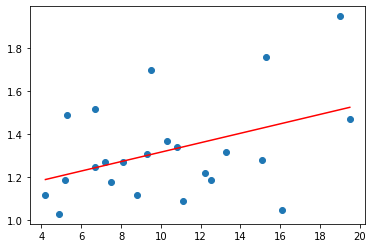

In [119]:
import statsmodels.formula.api as smf

model_fit = smf.ols('Vcf~glucose', df).fit()

print(model_fit.summary2())
print('Models Parameters')
print(f'Intercept: {model_fit.params.Intercept}')
print(f'Coefficient: {model_fit.params.glucose}')

print('Plot regression fitted line')
x_reg = np.linspace(df.glucose.min(), df.glucose.max(), len(df.Vcf))
y_reg = x_reg * model_fit.params.glucose + model_fit.params.Intercept
plt.scatter(df.glucose, df.Vcf)
plt.plot(x_reg, y_reg, 'r')
plt.show()

### Correlation

Pearson correlation, and two types of rank correlation (Spearman, Kendall)

*Comparing age and percentage of body-fat (measured by dual-photon absorptiometry)
for 18 normal adults.*

In [120]:
# Get the data
inFile = 'altman_11_1.txt'
url = url_base + inFile
df = pd.read_csv(url, names=['age', 'body_fat'])

print(df.head())

x = df.age
y = df.body_fat

   age  body_fat
0   23       9.5
1   23      27.9
2   27       7.8
3   27      17.8
4   39      31.4


In [121]:
# Calculate correlations
corr = {}
corr['pearson'], _ = stats.pearsonr(x, y)
corr['spearman'], _ = stats.spearmanr(x, y)
corr['kendall'], _ = stats.kendalltau(x, y)

print(corr)

{'pearson': 0.7920862321784911, 'spearman': 0.7538795855376156, 'kendall': 0.5762094850891228}


In [69]:
# Show that Spearman's rho is just the Pearson's R of the rank-ordered data
r_rankordered = stats.pearsonr(stats.rankdata(x), stats.rankdata(y))[0]
print("Spearman's rho = {0:5.3f}, and Pearson's r (rankordered) = {1:5.3f}".format(corr['spearman'], r_rankordered))

Spearman's rho = 0.754, and Pearson's r (rankordered) = 0.754


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats

### Get the data

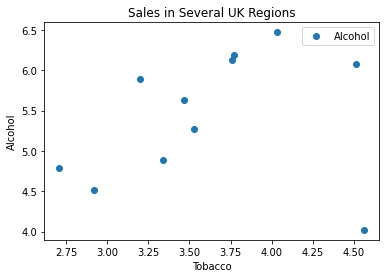

In [125]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''

# Read in the data. Note that for Python 2.x, you have to change the "import" statement
from io import StringIO

df = pd.read_csv(StringIO(data_str), sep=r'\s+')

# Plot the data
df.plot('Tobacco', 'Alcohol', style='o')
plt.ylabel('Alcohol')
plt.title('Sales in Several UK Regions')
plt.show()

### Show Regression Analysis

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Fri, 09 Jul 2021   Prob (F-statistic):            0.00723
Time:                        16:27:48   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0412      1.001      2.038      0.0

/home/berserk/RICERCA/CORSI/EGA/Applicazioni Statistiche e Machine Learning con Python/workspace/stats_applications/venv/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


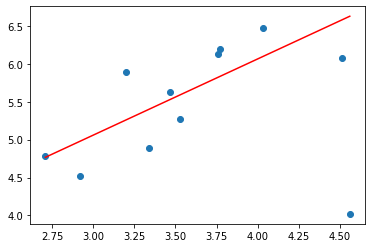

In [130]:
result = sm.ols('Alcohol ~ Tobacco', df[:-1]).fit()
print(result.summary())
print(result.params)

print('Plot regression fitted line')
x_reg = np.linspace(df.Tobacco.min(), df.Tobacco.max(), len(df.Alcohol))
y_reg = x_reg * result.params.Tobacco + result.params.Intercept
plt.scatter(df.Tobacco, df.Alcohol)
plt.plot(x_reg, y_reg, 'r')
plt.show()

### Model Parameters

#### F-Test

In [73]:
N = result.nobs
k = result.df_model + 1
dfm, dfe = k - 1, N - k
F = result.mse_model / result.mse_resid
p = 1.0 - stats.f.cdf(F, dfm, dfe)
print('F-statistic: {:.3f},  p-value: {:.5f}'.format(F, p))

F-statistic: 12.785,  p-value: 0.00723


### Coefficients

In [74]:
print(result.params)

Intercept    2.041223
Tobacco      1.005896
dtype: float64


#### Standard Error

In [75]:
# Standard Errors
df['Eins'] = np.ones((len(df),))
Y = df.Alcohol[:-1]
X = df[['Tobacco', 'Eins']][:-1]

In [76]:
X = df.Tobacco[:-1]

# add a column of ones for the constant intercept term
X = np.vstack((np.ones(X.size), X))

# convert the NumPy arrray to matrix
X = np.matrix(X)

# perform the matrix multiplication,
# and then take the inverse
C = np.linalg.inv(X * X.T)

# multiply by the MSE of the residual
C *= result.mse_resid

# take the square root
SE = np.sqrt(C)

print(SE)

[[1.001   nan]
 [  nan 0.281]]


<ipython-input-76-ccfc416f672d>:17: RuntimeWarning: invalid value encountered in sqrt
  SE = np.sqrt(C)


#### T-statistic

In [77]:
ii = 1
beta = result.params[ii]
se = SE[ii, ii]
t = beta / se
print('t =', t)

t = 3.5756084542390076


In [78]:
N = result.nobs
k = result.df_model + 1
dof = N - k
p_onesided = 1.0 - stats.t(dof).cdf(t)
p = p_onesided * 2.0
print('p = {0:.3f}'.format(p))

p = 0.007


#### Confidence Intervals

In [79]:
ii = 0

# the estimated coefficient, and its variance
beta, c = result.params[ii], SE[ii, ii]

# critical value of the t-statistic
N = result.nobs
P = result.df_model
dof = N - P - 1
z = stats.t(dof).ppf(0.975)

# the confidence interval
print(beta - z * c, beta + z * c)

-0.26791770937100523 4.350363883047427


### Skew and Kurtosis

In [80]:
d = Y - result.fittedvalues
S = np.mean(d ** 3.0) / np.mean(d ** 2.0) ** (3.0 / 2.0)
K = np.mean(d ** 4.0) / np.mean(d ** 2.0) ** (4.0 / 2.0)
print('Skewness: {:.3f},  Kurtosis: {:.3f}'.format(S, K))

Skewness: -0.014,  Kurtosis: 1.527


## Simple linear models

- "model_formulas" is based on examples in Kaplan "Statistical Modeling".
- "polynomial_regression" shows how to work with simple design matrices, like MATLAB's "regress" command.

Author: Thomas Haslwanter, Date:   Feb-2017

In [82]:
import pandas as pd
from urllib.request import urlopen
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Define models through formulas

In [83]:
# Get the data
inFile = 'swim100m.csv'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_kaplan/'
url = url_base + inFile
data = pd.read_csv(urlopen(url))

#### OLS Model

In [84]:
# Different models
model1 = ols("time ~ sex", data).fit()  # one factor
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     24.13
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           7.28e-06
Time:                        12:18:40   Log-Likelihood:                -219.23
No. Observations:                  62   AIC:                             442.5
Df Residuals:                      60   BIC:                             446.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1923      1.517     42.986      0.0

#### ANOVA

In [85]:
print(anova_lm(model1))

            df       sum_sq      mean_sq          F    PR(>F)
sex        1.0  1720.655232  1720.655232  24.132575  0.000007
Residual  60.0  4278.006477    71.300108        NaN       NaN


In [89]:
model2 = ols("time ~ sex + year", data).fit()  # two factors
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     159.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           1.58e-24
Time:                        12:19:23   Log-Likelihood:                -172.12
No. Observations:                  62   AIC:                             350.2
Df Residuals:                      59   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.7168     33.800     16.441      0.0

In [90]:
print(anova_lm(model2))

            df       sum_sq      mean_sq           F        PR(>F)
sex        1.0  1720.655232  1720.655232  108.479881  5.475511e-15
year       1.0  3342.177104  3342.177104  210.709831  3.935386e-21
Residual  59.0   935.829374    15.861515         NaN           NaN


In [91]:
model3 = ols("time ~ sex * year", data).fit()  # two factors with interaction
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           3.67e-28
Time:                        12:19:29   Log-Likelihood:                -160.30
No. Observations:                  62   AIC:                             328.6
Df Residuals:                      58   BIC:                             337.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       697.3012     39.221     17.779

In [92]:
print(anova_lm(model3))

            df       sum_sq      mean_sq           F        PR(>F)
sex        1.0  1720.655232  1720.655232  156.140793  4.299569e-18
year       1.0  3342.177104  3342.177104  303.285733  1.039245e-24
sex:year   1.0   296.675432   296.675432   26.921801  2.826421e-06
Residual  58.0   639.153942    11.019896         NaN           NaN
